# Part I - (The Exploration of the Prosper Loan Data)
## by Sean Griffiths

## Introduction

> The dataset that we will be analyzing is the Loan Data from Prosper. This dataset comprises 113,937 loans, with each described by 81 variables. Some of these variables include loan amount, borrrower (or interest) rate, borrorower income, and current loan status


## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('prosperLoanData.csv')
df.shape

(113937, 81)

In [3]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
df.tail()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
113932,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663000000,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333000000,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703000000,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,NaN,60,Completed,2013-08-13 00:00:00,0.28408,0.2605,0.2505,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274
113936,E6ED3600409833199F711B7,1140093,2014-01-15 09:27:37.657000000,NaN,36,Current,NaN,0.13189,0.1039,0.0939,...,-1.70,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [6]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


**Listing each column**

In [7]:
df.nunique()

ListingKey                     113066
ListingNumber                  113066
ListingCreationDate            113064
CreditGrade                         8
Term                                3
                                ...  
PercentFunded                     719
Recommendations                    17
InvestmentFromFriendsCount         14
InvestmentFromFriendsAmount       726
Investors                         751
Length: 81, dtype: int64

In [8]:
sum(df.duplicated())

0

In [9]:
df.isna().sum()

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

In [10]:
df['DebtToIncomeRatio'].iloc[10]

0.12

### What is the structure of your dataset?

> My dataset consists of 113,937 loan entries and 81 descriptive variables

### What is/are the main feature(s) of interest in your dataset?

> My main features of interest is which variables affect the loan amount that the borrowers recieve, and what variables affect the credit grade. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The features that will help support my investigation include Borrower Prosper Score, Loan Amount, Loan Status, Borrower State, Borrower Occupation, Borrower Employment, etc. 

## Univariate Exploration



In [31]:
#Function for initializing plot details
def plot_label(title, x_label, y_label, rotate):
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xticks(rotation=rotate)
    

## Loan Status Count Plot

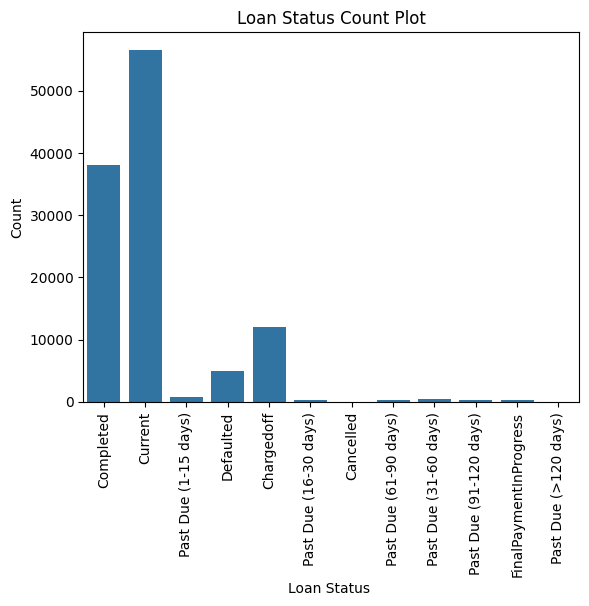

In [32]:
# Create Count Plot for Loan Status
base_color = sns.color_palette()[0]
sns.countplot(data = df, x = 'LoanStatus', color = base_color);
plot_label('Loan Status Count Plot', 'Loan Status ', 'Count', 90)

**OBSERVATION**
- The vast majority of the loans are current or completed.
- Past due loans are split amongst time periods

## Employment Count Plot

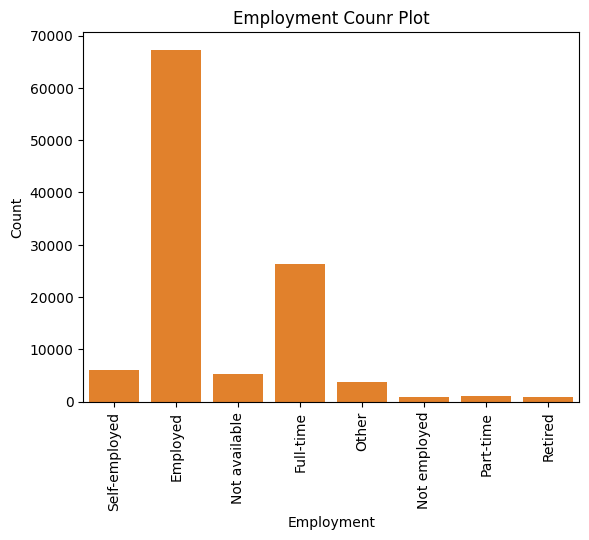

In [76]:
#count plot of employment status
base_color = sns.color_palette()[1]
sns.countplot(data = df, x = 'EmploymentStatus', color = base_color);
plot_label('Employment Counr Plot', 'Employment', 'Count', 90)

**OBSERVATION**
- The majority of borrowers are employed. 
- A very small amount of borrowers are unemployed.


## Borrower State

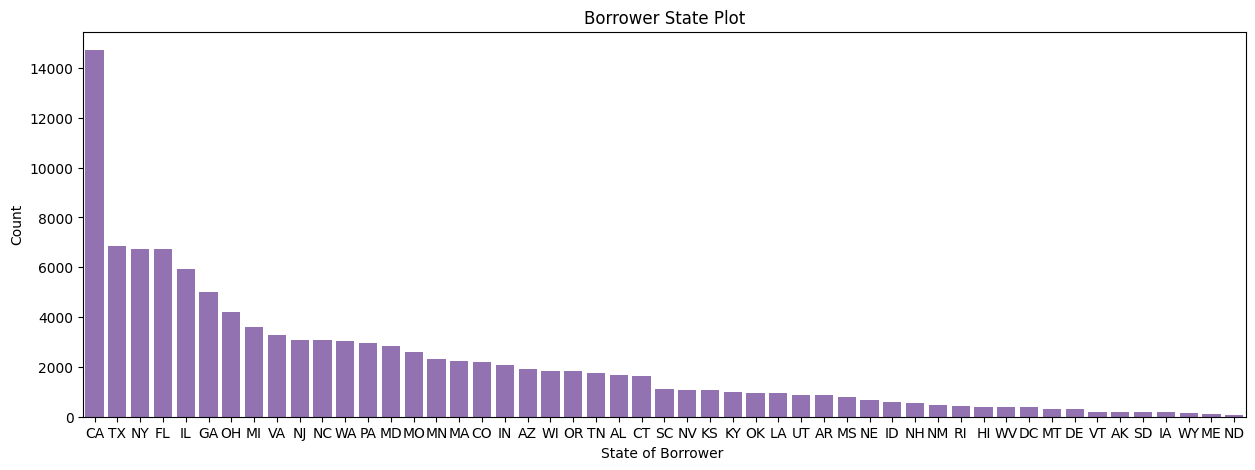

In [74]:
#count plot of state of borrowers
plt.figure(figsize=(15, 5))
base_color = sns.color_palette()[4]
order = df['BorrowerState'].value_counts().index
sns.countplot(data = df, x = 'BorrowerState', color = base_color, order = order);
plot_label('Borrower State Plot', 'State of Borrower ', 'Count', 0)

## Original Loan Amount

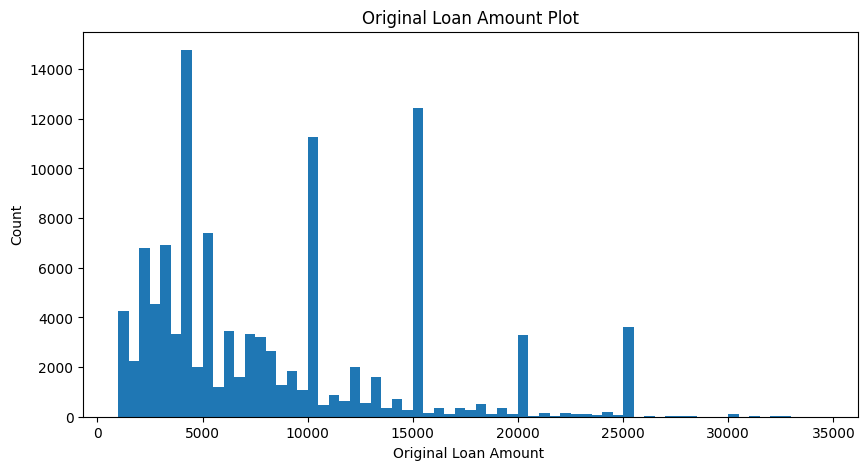

In [73]:
#create histogram of original loan amount
plt.figure(figsize = [10,5])
bins = np.arange(df['LoanOriginalAmount'].min(), df['LoanOriginalAmount'].max(), 500)
plt.hist(data = df, x = 'LoanOriginalAmount', bins = bins);
plot_label('Original Loan Amount Plot', 'Original Loan Amount ', 'Count', 0)

**OBSERVATION**
- I notice that the chart is multimodal, with the values 4500, 10500, and 15000 being highly frequent.

## Credit Score Range Lower Distribution

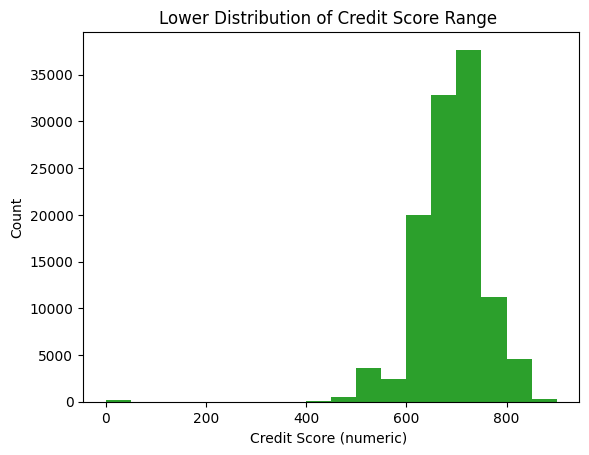

In [72]:
#historgram of lower distribution of credit score range
base_color = sns.color_palette()[2]
bins = np.arange(df['CreditScoreRangeLower'].min(),df['CreditScoreRangeLower'].max() + 50, 50)
plt.hist(data = df , x = 'CreditScoreRangeLower' , bins = bins, color = base_color);
plot_label('Lower Distribution of Credit Score Range ', 'Credit Score (numeric) ', 'Count', 0)

**OBSERVATION**
- The maximum credit score was around 700.
- Most of the credit score distribution is between 600 and 800

## Credit Score Range Upper Distribution

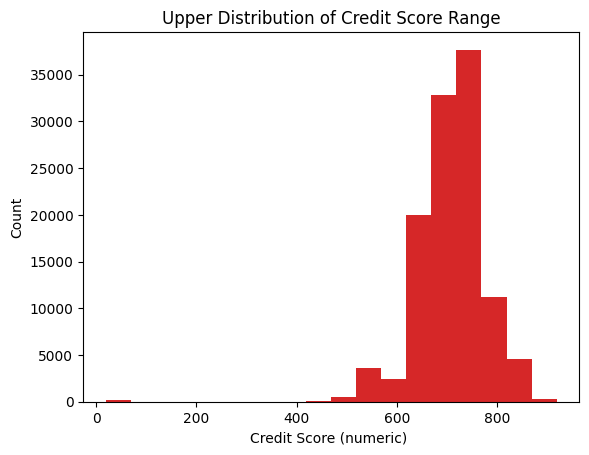

In [37]:
#upper distribution of credit score range
base_color = sns.color_palette()[3]
bins = np.arange(df['CreditScoreRangeUpper'].min(),df['CreditScoreRangeUpper'].max() + 50, 50)
plt.hist(data = df , x = 'CreditScoreRangeUpper' , bins = bins, color = base_color);
plot_label('Upper Distribution of Credit Score Range', 'Credit Score (numeric) ', 'Count', 0)

**OBSERVATION**
- The maximum credit score was about 750.
- Most of the credit score distribution is between 650 and 750

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

>  I expected the count of unemployed people to be low, but I was surprised how low it was. The amount of borrowers from California surprised me. I don't believe any transformations will be needed.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I detected that the loan original amount was mulitmodal. I did not perform any operations to adjust this data. 

## Bivariate Exploration



In [38]:
#Convert Loan Origination Date to datetime
df['LoanOriginationDate']= pd.to_datetime(df['LoanOriginationDate'])

In [39]:
#Make new column in our dataset for the year of loan origniation date
df['OriginationYear'] = df['LoanOriginationDate'].dt.year

In [59]:
#To rank levels of credit grade and loan status
rate_levels = ['AA','A' , 'B', 'C', 'D', 'E', 'HR', 'NC']

## Year of Loan vs Loan Amount

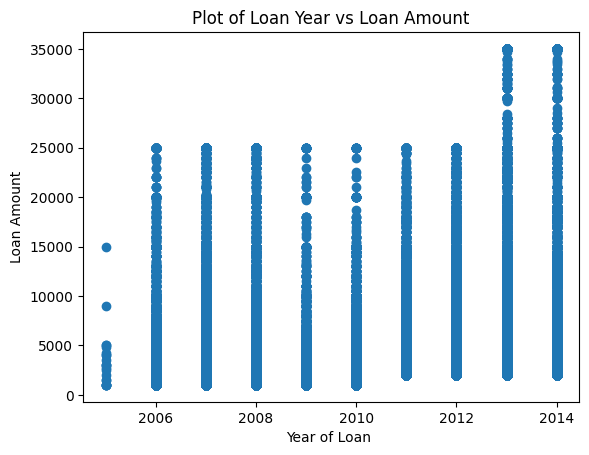

In [60]:
#Create scatter plot of loan year vs loan amount
plt.scatter(data = df, x = 'OriginationYear', y='LoanOriginalAmount');
plot_label('Plot of Loan Year vs Loan Amount', 'Year of Loan ', 'Loan Amount', 0)

**OBSERVATION**
- The loan amount is relatively small in 2005
- Between 2006 and 2012, the loan amount remains relatively the same.
- Loan amount significantly increases in 2013 and 2014.
- Overall, it has increased over the years.

In [61]:
#Creates new dataframe containing only rows where loan status is completed or defaulted
loanCondition = (df['LoanStatus'] == 'Completed') | (df['LoanStatus'] == 'Defaulted')
new_loanstatus_df = df[loanCondition]

## Loan Status vs Loan Amount

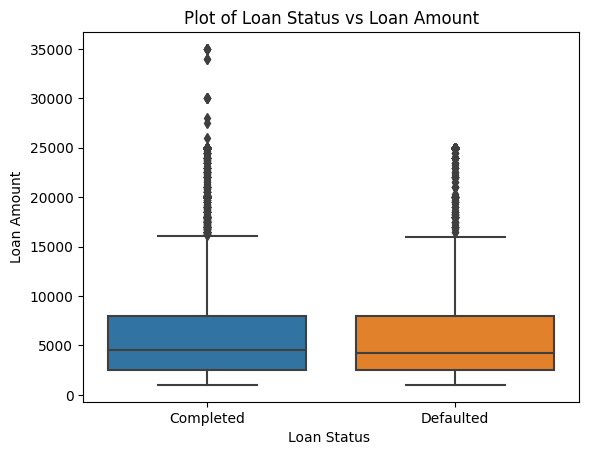

In [71]:
#Create box plot comparing loan status and loan amount
sns.boxplot(data=new_loanstatus_df, x='LoanStatus', y='LoanOriginalAmount');
plot_label('Plot of Loan Status vs Loan Amount', 'Loan Status ', 'Loan Amount', 0)


**OBSERVATION**
- According to the box plot, loans with a completed status contain values with  higher loan amounts than those with defaulted (failed) loan statuses.

## Credit Grade and Employment Status

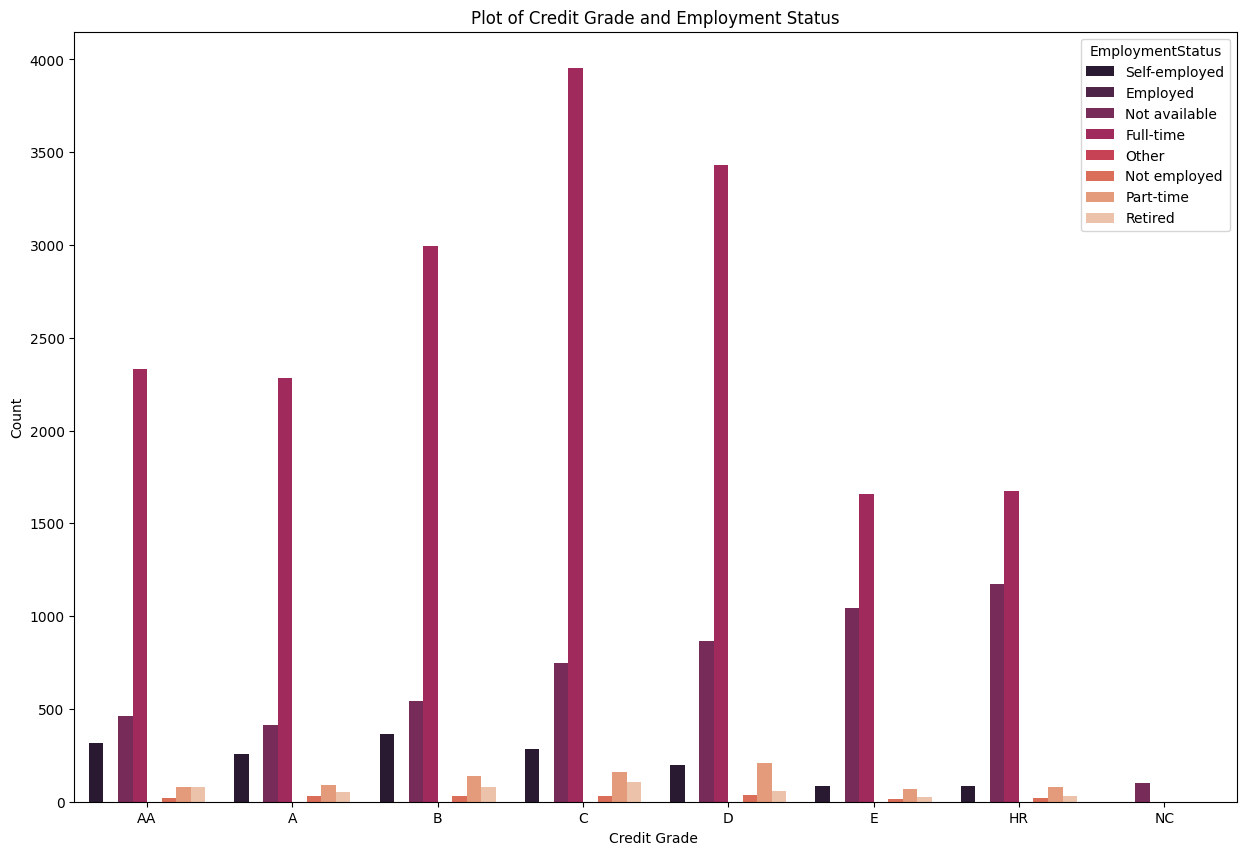

In [70]:
#Create count plot comparing Credit Grade and Employment Status
plt.figure(figsize = [15,10])
sns.countplot(data=df, x = 'CreditGrade', hue = 'EmploymentStatus', palette = 'rocket', order = rate_levels);
plot_label('Plot of Credit Grade and Employment Status', 'Credit Grade ', 'Count', 0)

**OBSERVATION**
- The average credit grade ratings display a larger count of unemployed, part-time, and retired borrowers

## Monthly Loan Payment and Credit Grade

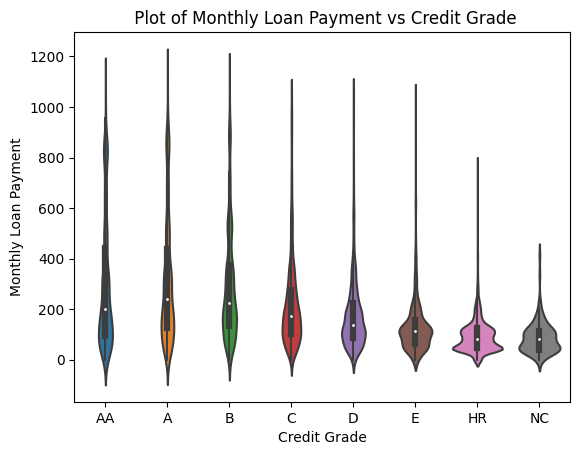

In [77]:
#Violin plot of monthly loan payment and credit grade
sns.violinplot(data=df, x = "CreditGrade", y="MonthlyLoanPayment", order = rate_levels);
plot_label(' Plot of Monthly Loan Payment vs Credit Grade', 'Credit Grade', 'Monthly Loan Payment', 0)

**OBSERVATION**
- The credit grades AA, A, and B, had the highest values for monthly loan payments.
- AA, A, and B also had the largest distributions of monthly laoan payments. 
- A has the highest median value for monthly loan payment

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> I observed that the loan amounts did increase over the years. I noticed that higher credit grades came with the potential of higher monthly loans. I also learned that average credit grades often accompanied unemployed, part-time, and retired borrowers.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I observed an interesting relationship with loan status and original loan payment.

## Multivariate Exploration



## Credit Grade, Monthly Loan Payment, Loan Status

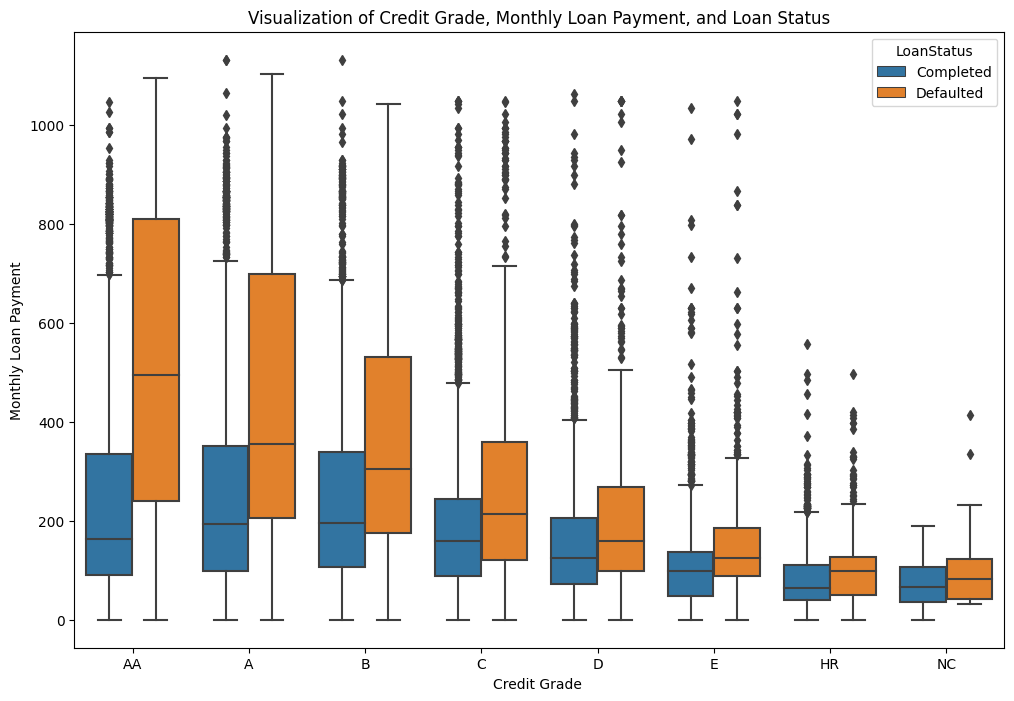

In [78]:
#Multivariate box plot of credit grade, monthly loan payment, and loan status
plt.figure(figsize = [12, 8])
sns.boxplot(data = new_loanstatus_df, x= 'CreditGrade', y='MonthlyLoanPayment', hue='LoanStatus', order = rate_levels);
plot_label('Visualization of Credit Grade, Monthly Loan Payment, and Loan Status', 'Credit Grade ', 'Monthly Loan Payment', 0)

**OBSERVATION**
- The defaulted credits from individuals have a higher montly loan payment than for completed credits in each credit grade.
- The monthly loan payments have a positive correlation to the credit grade, for both completed and defaulted loan status.


## Credit Grade, Employment Status, and Loan Status 

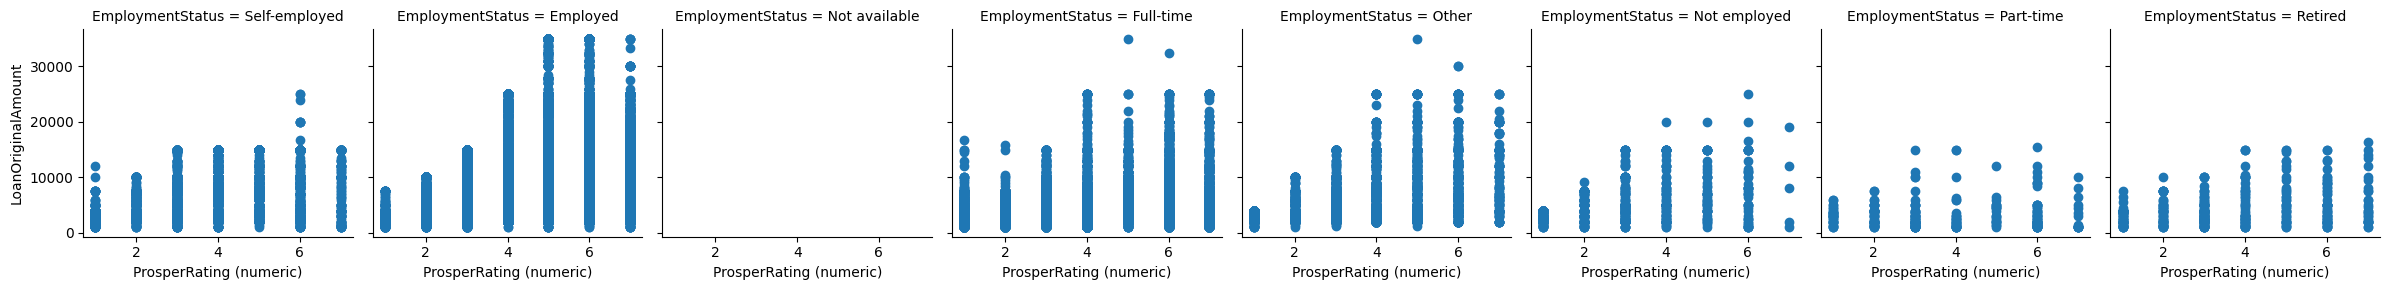

In [83]:
#Facet Grid showing relationship between credit grade, employment status, and loan status relationship
g = sns.FacetGrid(data = df, col='EmploymentStatus', margin_titles=True)
g.map(plt.scatter, 'ProsperRating (numeric)', 'LoanOriginalAmount')


**OBSERVATION**
- For employed borrowers, a higher prosper rating results in a higher loan amount
- Prosper rating seems to have little effect on loan amount for part-time borrowers


## Original Loan Amount, Loan Status, and Employment Status

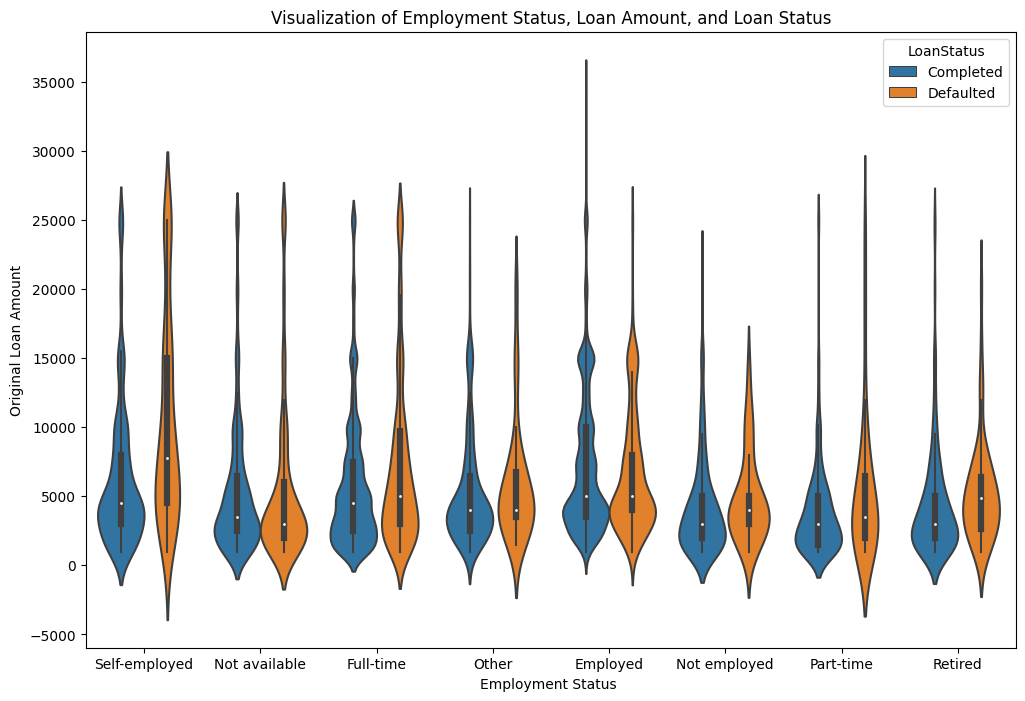

In [84]:
#Violin plot of original loan amount, loan status, and employment status
plt.figure(figsize=[12,8])
sns.violinplot(data = new_loanstatus_df, x = 'EmploymentStatus', y='LoanOriginalAmount', hue='LoanStatus');
plot_label('Visualization of Employment Status, Loan Amount, and Loan Status', 'Employment Status ', 'Original Loan Amount', 0)

**OBSERVATION**
- Employed borrowers with a completed loan status contains the highest original loan amount.
- On the contrary, unemployed borrowers with a defaulted loan status contains the lowest original loan amounts.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Through the investigations I learned that being employed and having a completed loan status has a positive correlation with the original loan amount. I learned that good credit grades often accompanied fulltime employed borrowers with a completed loan status. 

### Were there any interesting or surprising interactions between features?

> I was surprised that defaulted loan credits often came with a higher monthly loan payment.

## Conclusions
Based on the findings, I learned that 
- being employed accompanies a higher original loan amount
- having a completed loan status accompanies a higher original loan amount
-  the original loan amounts increase over the years. 
- The potential of higher credit grades often came with higher monthly loans.
- Average credit grades often accompanied unemployed, part-time, and retired borrowers.

> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML.


> At the end of your report, make sure that you export the notebook as an html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep track of where the exported file goes, so you can put it in the same folder as this notebook for project submission. Also, make sure you remove all of the quote-formatted guide notes like this one before you finish your report!

